In [1]:
import sys
sys.path.insert(0,'/media/wittmaan/Elements/GoogleDrive/python/a2d2/src/main/python/')

In [3]:
from processing.data_loader import DataLoader
from processing.preprocessing import orientation_confidence_flip
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [4]:
data_loader = DataLoader("/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes", "/media/wittmaan/Elements/data/a2d2/cams_lidars.json")
dim_avg, dim_cnt = data_loader.get_average_dimension()

2020-07-21 12:39:26,473 - input_path=/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes
2020-07-21 12:39:26,477 - using 14 directories as train and 4 as validation
2020-07-21 12:39:27,342 - reading /media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730 from ['/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181108_103155', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_154421', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_135952', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181108_084007', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_101535', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181107_132730', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_170238', '/media/wittmaan/Elements/data/a2d2/cam

2020-07-21 12:39:30,171 - reading /media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_170238 from ['/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181108_103155', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_154421', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_135952', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181108_084007', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_101535', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181107_132730', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181204_170238', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_124435', '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181108_091945', '/media/wittmaan/Elements/data/a2d2/camera_lidar_s

In [5]:
new_data = orientation_confidence_flip(data_loader.train_labels, dim_avg)

In [8]:
SPLIT = 0.9
all_examples = len(new_data)
trv_split = int(SPLIT * all_examples)
trv_split

30095

In [9]:
keys = list(range(len(new_data)))
np.random.shuffle(keys)

In [10]:
train_inst = new_data[keys[3]]
image_dir = new_data[keys[3]]['image']
image_dir

'/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20181107_132730/camera/cam_front_center/20181107132730_camera_frontcenter_000002714.jpg'

In [11]:
JIT = 3

In [12]:
xmin = train_inst["xmin"] #+ np.random.randint(-JIT, JIT + 1)
ymin = train_inst["ymin"] #+ np.random.randint(-JIT, JIT + 1)
xmax = train_inst["xmax"] #+ np.random.randint(-JIT, JIT + 1)
ymax = train_inst["ymax"] #+ np.random.randint(-JIT, JIT + 1)
print(xmin, xmax, ymin, ymax)

img = cv2.imread(image_dir)
img.shape

xmin = max(xmin, 0)
ymin = max(ymin, 0)
xmax = min(xmax, img.shape[1] - 1)
ymax = min(ymax, img.shape[0] - 1)
print(xmin, xmax, ymin, ymax)

129.8844 484.8234 689.2859 895.9332
129.8844 484.8234 689.2859 895.9332


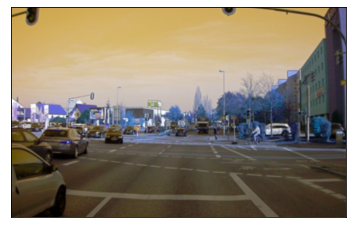

In [13]:
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [14]:
import copy
img2 = copy.deepcopy(img[int(ymin) : int(ymax) + 1, int(xmin) : int(xmax) + 1]).astype(np.float32)

In [15]:
img3 = img[int(ymin) : int(ymax), int(xmin) : int(xmax) ]

In [16]:
img.shape

(1208, 1920, 3)

In [17]:
data_loader.train_labels[11]

{'name': 'Car',
 'image': '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730/camera/cam_front_center/20180925112730_camera_frontcenter_000001390.jpg',
 'ymin': 710.5515,
 'xmin': 243.3163,
 'ymax': 803.5787,
 'xmax': 448.9709,
 'dims': array([ 0.16440468, -0.05643624, -0.30905823]),
 'new_alpha': 1.5707963267948966,
 'P': array([[-1.68323117e+03, -1.17637945e+02,  9.65434141e+02],
        [ 1.24337267e+02, -1.77908891e+03,  6.84419360e+02],
        [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
 'center': [30.267850000000003, 10.9875, -1.1774000000000002],
 'orient': array([[ 6.123234e-17,  1.000000e+00],
        [ 6.123234e-17, -1.000000e+00]]),
 'conf': array([0.5, 0.5]),
 'orient_flipped': array([[ 6.123234e-17, -1.000000e+00],
        [ 6.123234e-17,  1.000000e+00]]),
 'conf_flipped': array([0.5, 0.5])}

In [18]:
act_img = data_loader.train_images[110]
act_labels = [x for x in data_loader.train_labels if x["image"] == act_img]

In [19]:
act_labels

[{'name': 'Car',
  'image': '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730/camera/cam_front_center/20180925112730_camera_frontcenter_000013802.jpg',
  'ymin': 689.0248,
  'xmin': 1138.481,
  'ymax': 778.3533,
  'xmax': 1256.724,
  'dims': array([ 0.37440468, -0.05643624, -0.13905823]),
  'new_alpha': 1.5707963267948966,
  'P': array([[ 1.68613999e+03,  6.35435954e+01,  9.65434141e+02],
         [-6.71623171e+01,  1.78216338e+03,  6.84419360e+02],
         [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]),
  'center': [34.001599999999996, -4.60115, -0.8840999999999999],
  'orient': array([[ 6.123234e-17,  1.000000e+00],
         [ 6.123234e-17, -1.000000e+00]]),
  'conf': array([0.5, 0.5]),
  'orient_flipped': array([[ 6.123234e-17, -1.000000e+00],
         [ 6.123234e-17,  1.000000e+00]]),
  'conf_flipped': array([0.5, 0.5])},
 {'name': 'Car',
  'image': '/media/wittmaan/Elements/data/a2d2/camera_lidar_semantic_bboxes/20180925_112730/camera/cam_fro

In [20]:
img = cv2.imread(act_img)
height, width, channel = img.shape

(1138, 689)
(1234, 681)
(1304, 704)
(1506, 699)
(990, 698)


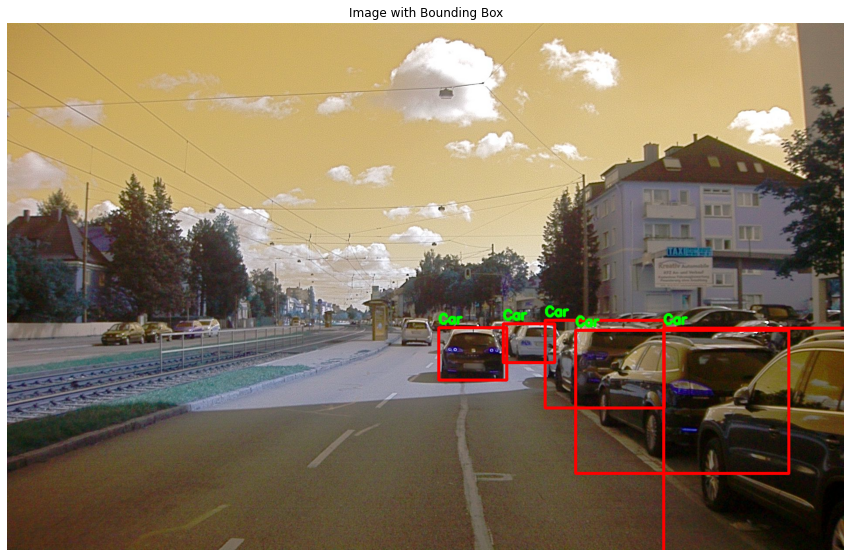

In [24]:
for bb in act_labels:
    #print(bb)
    xmin = int(bb['xmin'])
    xmax = int(bb['xmax'])
    ymin = int(bb['ymin'])
    ymax = int(bb['ymax'])
    #xmin = int(xmin*width)
    #xmax = int(xmax*width)
    #ymin = int(ymin*height)
    #ymax = int(ymax*height)
    label_name = bb['name']
    print((xmin,ymin))
    
    cv2.rectangle(img, (xmin,ymin), (xmax,ymax), (255,0,0), 5)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, label_name, (xmin,ymin-10), font, 1, (0,255,0), 5)
    
plt.figure(figsize=(15,10))
plt.title('Image with Bounding Box')
plt.imshow(img)
plt.axis("off")
plt.show()

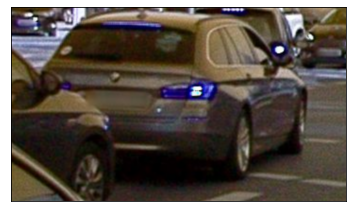

In [25]:
plt.imshow(img3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [26]:
img4 = cv2.resize(img3, (24, 24))

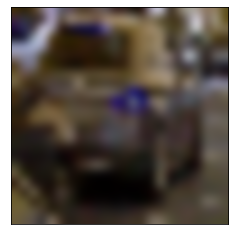

In [27]:
plt.imshow(img4, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()